<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/yfinance_package_to_download_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 12.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
# Importing the modules
import yfinance as yf
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt


In [8]:
dataset = yf.download("TSLA", start="2017-01-01", end="2022-05-19")
dataset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500
...,...,...,...,...,...,...
2022-05-12,701.000000,759.659973,680.000000,728.000000,728.000000,46771000
2022-05-13,773.479980,787.349976,751.570007,769.590027,769.590027,30651800
2022-05-16,767.159973,769.760010,719.090027,724.369995,724.369995,28699500


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1354 entries, 2017-01-03 to 2022-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1354 non-null   float64
 1   High       1354 non-null   float64
 2   Low        1354 non-null   float64
 3   Close      1354 non-null   float64
 4   Adj Close  1354 non-null   float64
 5   Volume     1354 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 74.0 KB


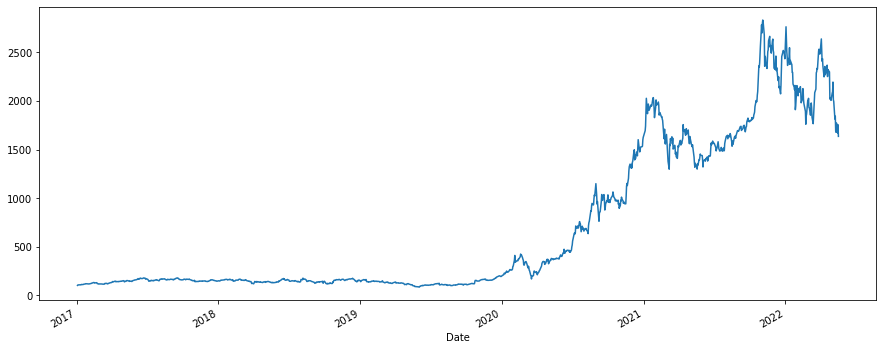

In [11]:
(dataset['Adj Close'] / dataset['Adj Close'].iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

#Let's do the multiple stocks.

In [17]:
tickers = ['SBUX', 'WMT', 'AMZN', 'HD']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start="2000-01-01", end="2022-05-31")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
mydata.head()

,SBUX,WMT,AMZN,HD
Date,,,,
2000-01-03,2.503720,44.580296,89.3750,41.701786
2000-01-04,2.424388,42.912197,81.9375,39.502750
2000-01-05,2.456121,42.036438,69.7500,40.302402
2000-01-06,2.544973,42.495159,65.5625,38.383224
2000-01-07,2.532281,45.706284,69.5625,40.622269


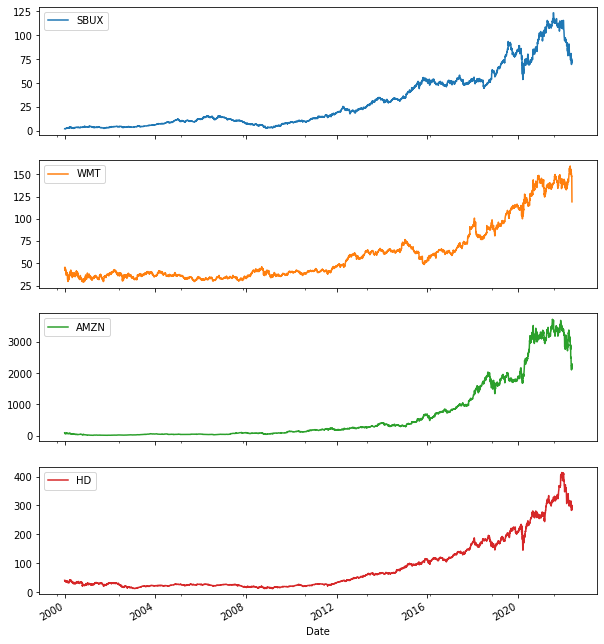

In [19]:
mydata.plot(figsize=(10, 12), subplots=True);  

In [20]:
mydata.describe().round(2)  

,SBUX,WMT,AMZN,HD
count,5632.00,5632.00,5632.00,5632.00
mean,30.75,59.33,642.96,84.04
std,30.04,32.15,965.07,88.83
min,2.42,28.96,5.97,13.01
25%,7.52,36.35,43.15,24.42
50%,15.18,42.04,179.33,32.53
75%,50.42,66.65,769.87,118.19
max,123.53,159.29,3731.41,413.68


In [27]:
mydata.pct_change().describe().round(4) 

,SBUX,WMT,AMZN,HD
count,5631.0000,5631.0000,5631.0000,5631.0000
mean,0.0008,0.0003,0.0011,0.0005
std,0.0213,0.0150,0.0320,0.0194
min,-0.1842,-0.1138,-0.2477,-0.2874
25%,-0.0090,-0.0067,-0.0119,-0.0081
50%,0.0003,0.0002,0.0005,0.0005
75%,0.0100,0.0070,0.0135,0.0092
max,0.1838,0.1171,0.3447,0.1407


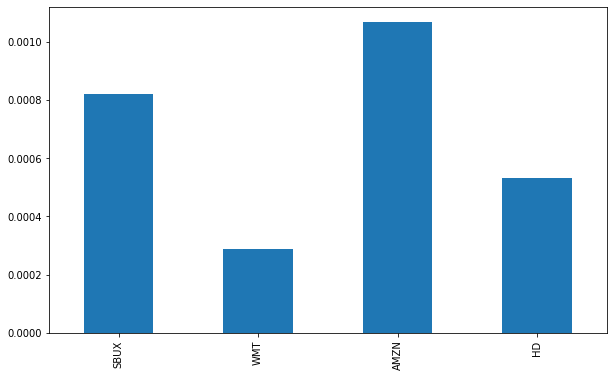

In [28]:
mydata.pct_change().mean().plot(kind='bar', figsize=(10, 6));  

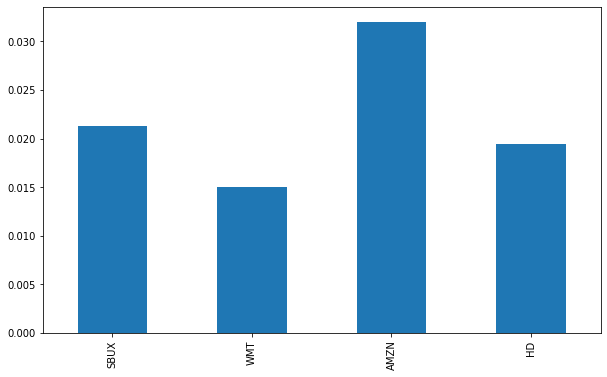

In [29]:
mydata.pct_change().std().plot(kind='bar', figsize=(10, 6));  

In [33]:
ret = np.log(mydata / mydata.shift(1))  
ret.describe()

,SBUX,WMT,AMZN,HD
count,5631.000000,5631.000000,5631.000000,5631.000000
mean,0.000596,0.000174,0.000564,0.000343
std,0.021199,0.014969,0.031585,0.019546
min,-0.203626,-0.120765,-0.284568,-0.338773
25%,-0.009081,-0.006747,-0.012017,-0.008143
50%,0.000303,0.000241,0.000462,0.000536
75%,0.009962,0.006937,0.013455,0.009195
max,0.168728,0.110723,0.296181,0.131612


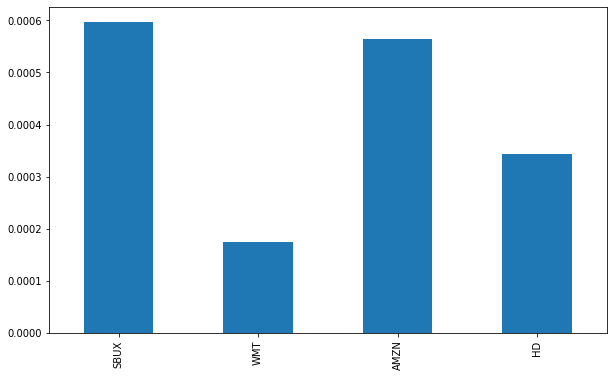

In [34]:
ret.mean().plot(kind='bar', figsize=(10, 6));  

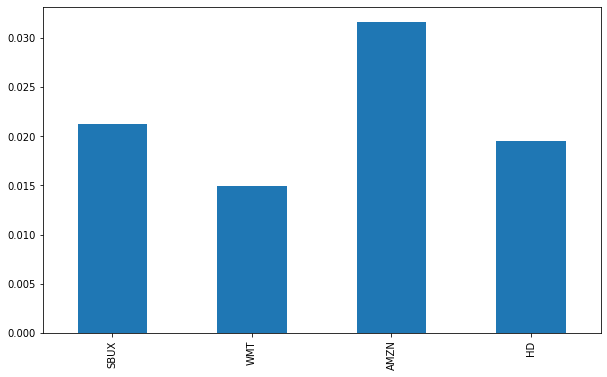

In [35]:
ret.std().plot(kind='bar', figsize=(10, 6));  

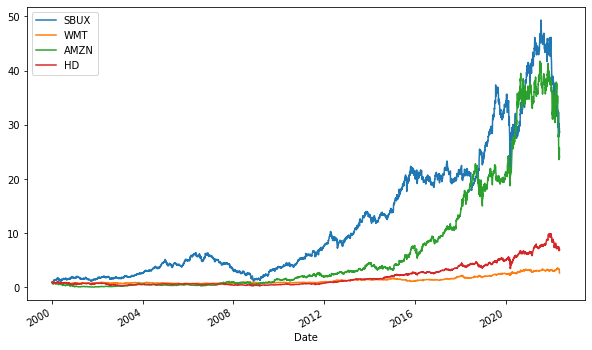

In [36]:
ret.cumsum().apply(np.exp).plot(figsize=(10, 6));  

In [37]:
ret.dropna(inplace=True)

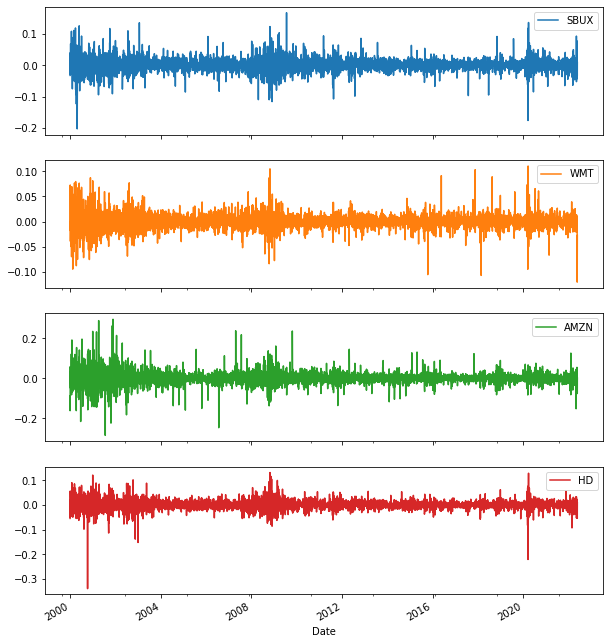

In [39]:
ret.plot(subplots=True, figsize=(10, 12));

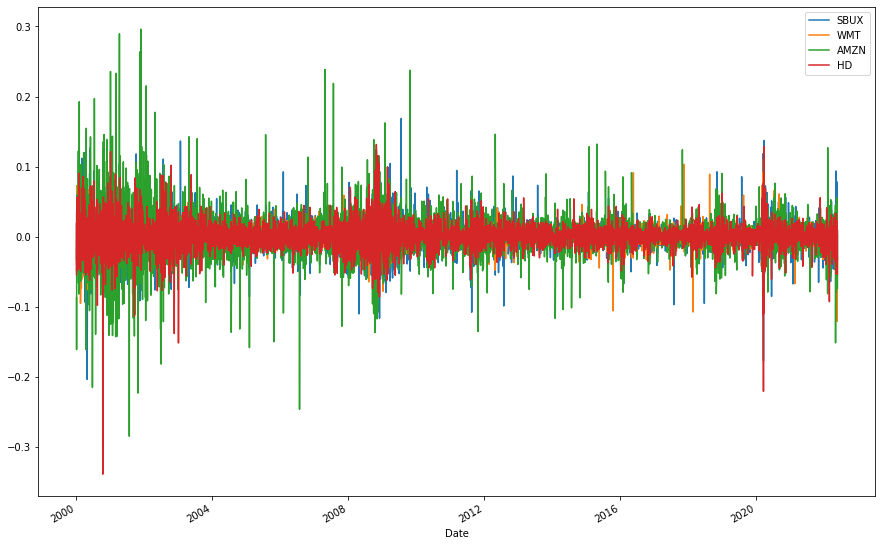

In [41]:
ret.plot(subplots=False, figsize=(15, 10));

### Oops! AMZN was not a public firm in 1995. Let's choose another one instead.

In [42]:
tickers = ['SBUX', 'WMT', 'ORCL', 'HD']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start="1995-01-01", end="2020-12-31")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [43]:
mydata

,SBUX,WMT,ORCL,HD
Date,,,,
1995-01-03,0.679083,6.736091,1.778506,6.333531
1995-01-04,0.666390,6.978107,1.794061,6.298632
1995-01-05,0.648936,7.058782,1.757766,6.263737
1995-01-06,0.628311,7.099112,1.778506,6.246289
1995-01-09,0.647349,7.058782,1.830358,6.333531
...,...,...,...,...
2020-12-23,99.195160,139.926331,63.821392,262.703430
2020-12-24,99.146561,140.199890,63.489101,263.784241
2020-12-28,101.411163,141.880325,63.401131,262.158234


### What if we invest $1 in 1995?

In [44]:
(mydata / mydata.iloc[0] * 1)

,SBUX,WMT,ORCL,HD
Date,,,,
1995-01-03,1.000000,1.000000,1.000000,1.000000
1995-01-04,0.981308,1.035928,1.008746,0.994490
1995-01-05,0.955607,1.047905,0.988338,0.988980
1995-01-06,0.925234,1.053892,1.000000,0.986225
1995-01-09,0.953270,1.047905,1.029155,1.000000
...,...,...,...,...
2020-12-23,146.072220,20.772630,35.884833,41.478195
2020-12-24,146.000654,20.813241,35.697996,41.648844
2020-12-28,149.335449,21.062709,35.648533,41.392114


### What if we invest $100?

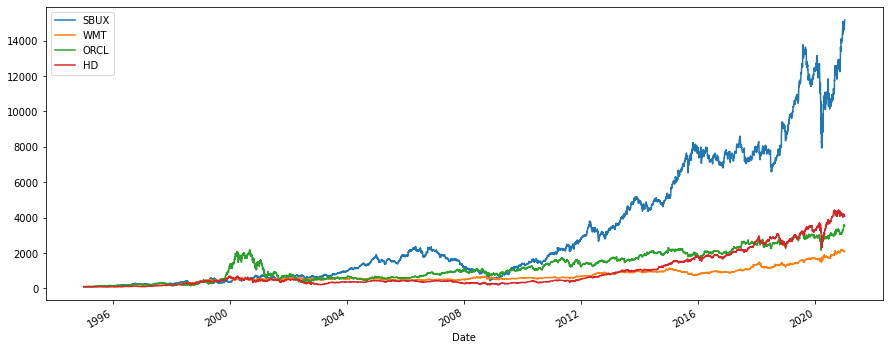

In [45]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [46]:
tickers = ['SBUX', 'WMT', 'ORCL', 'HD']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start="2000-01-01", end="2020-12-31", interval="1wk")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


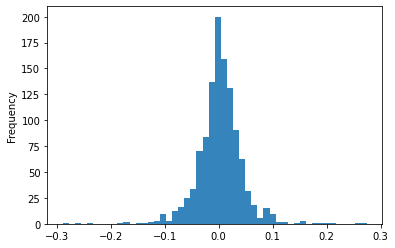

In [47]:
mydata["HD"].pct_change().plot.hist(alpha=0.9, bins=50)

In [48]:
tickers = ['SBUX', 'WMT', 'ORCL', 'HD']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start="2000-01-01", end="2020-12-31", interval="1d")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [49]:
mydata

,SBUX,WMT,ORCL,HD
Date,,,,
2000-01-03,2.503720,44.580292,24.806074,41.701782
2000-01-04,2.424388,42.912189,22.614220,39.502758
2000-01-05,2.456121,42.036449,21.419847,40.302418
2000-01-06,2.544973,42.495148,20.159863,38.383232
2000-01-07,2.532281,45.706284,21.708597,40.622265
...,...,...,...,...
2020-12-23,99.195160,139.926346,63.821404,262.703430
2020-12-24,99.146568,140.199890,63.489098,263.784210
2020-12-28,101.411163,141.880325,63.401127,262.158203


### resmaple of Pandas ###
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [50]:
mydata_m=mydata.resample('BM').last()
mydata_m

,SBUX,WMT,ORCL,HD
Date,,,,
2000-01-31,3.249441,36.531647,20.980167,36.224167
2000-02-29,3.566770,32.528210,31.184801,36.783936
2000-03-31,4.550488,37.746773,32.786026,41.292625
2000-04-28,3.070152,36.995167,33.573517,36.171055
2000-05-31,3.452532,38.498367,30.187281,31.369606
...,...,...,...,...
2020-08-31,81.713600,135.162766,55.698818,274.579224
2020-09-30,83.116272,136.194595,58.112888,268.928955
2020-10-30,84.122337,135.065430,54.839489,258.276794


In [51]:
returns=mydata_m.pct_change()

In [52]:
returns

,SBUX,WMT,ORCL,HD
Date,,,,
2000-01-31,NaN,NaN,NaN,NaN
2000-02-29,0.097656,-0.109588,0.486394,0.015453
2000-03-31,0.275801,0.160432,0.051346,0.122572
2000-04-28,-0.325314,-0.019912,0.024019,-0.124031
2000-05-31,0.124548,0.040632,-0.100860,-0.132743
...,...,...,...,...
2020-08-31,0.109755,0.077441,0.031921,0.073637
2020-09-30,0.017166,0.007634,0.043341,-0.020578
2020-10-30,0.012104,-0.008291,-0.056328,-0.039610


In [53]:
returns2=returns.dropna()

In [54]:
returns2

,SBUX,WMT,ORCL,HD
Date,,,,
2000-02-29,0.097656,-0.109588,0.486394,0.015453
2000-03-31,0.275801,0.160432,0.051346,0.122572
2000-04-28,-0.325314,-0.019912,0.024019,-0.124031
2000-05-31,0.124548,0.040632,-0.100860,-0.132743
2000-06-30,0.123162,0.001092,0.169565,0.020020
...,...,...,...,...
2020-08-31,0.109755,0.077441,0.031921,0.073637
2020-09-30,0.017166,0.007634,0.043341,-0.020578
2020-10-30,0.012104,-0.008291,-0.056328,-0.039610


In [55]:
sbux_stock = returns2["SBUX"]

In [56]:
sbux_stock

Date
2000-02-29    0.097656
2000-03-31    0.275801
2000-04-28   -0.325314
2000-05-31    0.124548
2000-06-30    0.123162
                ...   
2020-08-31    0.109755
2020-09-30    0.017166
2020-10-30    0.012104
2020-11-30    0.132500
2020-12-31    0.081106
Freq: BM, Name: SBUX, Length: 251, dtype: float64

(array([ 2.,  0.,  0.,  0.,  2.,  0.,  2.,  4.,  5., 13., 16., 26., 27.,
        40., 34., 28., 17., 15.,  9.,  5.,  1.,  1.,  1.,  2.,  1.]),
 array([-0.3253137 , -0.30023997, -0.27516623, -0.25009249, -0.22501875,
        -0.19994501, -0.17487127, -0.14979753, -0.12472379, -0.09965006,
        -0.07457632, -0.04950258, -0.02442884,  0.0006449 ,  0.02571864,
         0.05079238,  0.07586612,  0.10093986,  0.12601359,  0.15108733,
         0.17616107,  0.20123481,  0.22630855,  0.25138229,  0.27645603,
         0.30152977]),
 <a list of 25 Patch objects>)

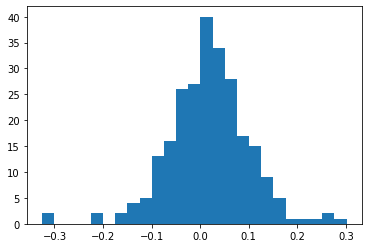

In [57]:
plt.hist(sbux_stock,bins=25)

In [58]:
p=np.percentile(sbux_stock, 50)
p

0.020890229606218558

In [59]:
sbux_stock.median()

0.020890229606218558

In [60]:
p=np.percentile(sbux_stock, 95)
p

0.14582886300958497